## **2.6장 실습 - 타이타닉 생존자 예측**

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/content/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
# 데이터 칼럼 타입 확인
print("학습 데이터 정보 \n")
df.info()

학습 데이터 정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# Null 값 처리
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Cabin'].fillna('N', inplace = True)
df['Embarked'].fillna('N', inplace = True)

print('데이터 세트 Null 값 개수: ', df.isnull().sum().sum())

데이터 세트 Null 값 개수:  0


In [25]:
# 피처의 값 분류 살펴보기
print('Sex 값 분포: \n', df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', df['Embarked'].value_counts())

Sex 값 분포: 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [26]:
# Cabin 속성 앞 글자만 추출
df['Cabin'] = df['Cabin'].str[:1]
print(df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [27]:
# 성별에 따른 생존자의 수 비교
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

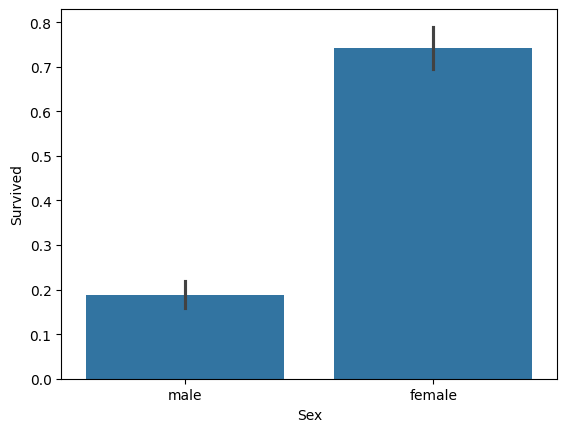

In [28]:
# 분석 결과 시각화 - 성별
sns.barplot(x = 'Sex', y = 'Survived', data = df)

<Axes: xlabel='Pclass', ylabel='Survived'>

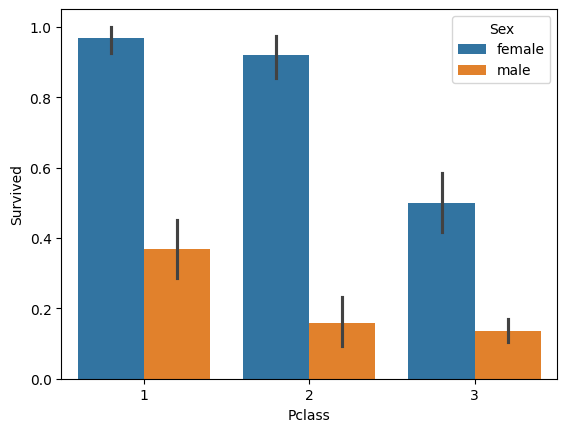

In [30]:
# 분석 결과 시각화 - 부자 + 성별
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df)

In [31]:
# Age에 따른 생존 확률 비교
# 값을 범위별로 분류, 카테고리 값 할당
def get_category(age):
    cat = ''
    if age <= -1:
        cat = 'Unknown'
    elif age <= 5:
        cat = 'Baby'
    elif age <= 12:
        cat = 'Child'
    elif age <= 18:
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35:
        cat = 'Young Adult'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat

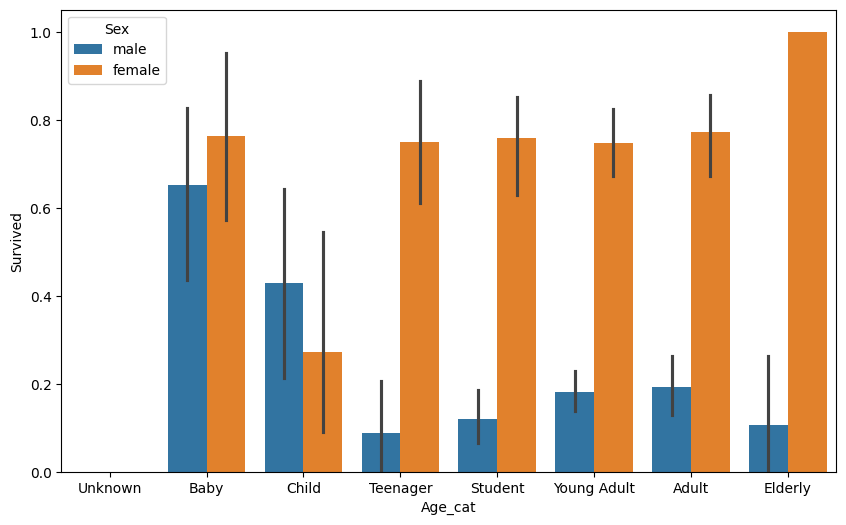

In [32]:
plt.figure(figsize = (10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = df, order = group_names)
df.drop('Age_cat', axis = 1, inplace = True)

여자 Baby의 경우 비교적 생존 확률이 높았다.

여자 Child의 경우 비교적 생존 확률이 낮았다.

여자 Elderly의 경우 생존 확률이 매우 높았다.

=> Sex, Age, PClass가 생존 여부를 결정하는 중요한 요소로 작용함을 확인.

In [33]:
# 문자열 피처 -> 숫자형 카테고리 피처로 변환
# 인코딩 - 레이블 인코더 객체 사용
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


**transform_features(  )**: 데이터의 전처리를 전체적으로 호출하는 함수
- Null 처리
- 포매팅
- 인코딩

In [37]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [38]:
df = pd.read_csv('/content/train.csv')
y_df = df['Survived']
x_df = df.drop('Survived', axis=1)

x_df = transform_features(x_df)

In [39]:
# 테스트 데이터 추출
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=11)

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
# 결정 트리, RandonForest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeclassifier 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/ 예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도 : 0.8492


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logictic Regression이 높은 정확도를 보이고 있다.

그러나 아직 최적화 작업을 수행하지 않았고 데이터 양도 충분하지 않기에 평가하기에는 조금 이름.

In [50]:
# 교차 검증으로 결정 트리 모델 평가하기
from sklearn.model_selection import KFold
def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFoLd 객체를 생성, 폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차검증 수행.
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_df)):
    # x_df 데이터에서 교차검증별로 학습과 검증 데이터를 가리키는 index 생성
        x_train, x_test = x_df.values[train_index], x_df.values[test_index]
        y_train, y_test = y_df.values[train_index], y_df.values[test_index]
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
# 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도: 0.7823


평균 정확도는 약 78.23%

In [51]:
# cross_val_score()를 이용해 교차 검증 수행하기
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, x_df, y_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


K 폴드와 cross_val_score(  )의 수치가 다른 이유:

cross_val_score(  )가 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문.

In [54]:
# GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고, 이를 예측해보기
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터: ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8715


학습 후 예측 정확도가 87.15%로 향상됨.

## **3.6장 실습 - 피마 인디언 당뇨병 예측**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

dd = pd.read_csv('/content/diabetes.csv')
print(dd['Outcome'].value_counts())
dd.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [58]:
# feature값과 Null 개수 살펴보기
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Null값은 없으며, 피처 타입은 모두 숫자형이다.
- 별도의 피처 인코딩은 필요없음

In [73]:
# 사전 작업 - 함수 정의 - 정확도
from sklearn.base import BaseEstimator
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve

import numpy as np
import pandas as pd

In [74]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print ('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [75]:
# 로지스틱 회귀를 이용한 예측 모델 생성

# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출.
# 맨 끝이 outcome 칼럼으로 레이블값. 칼럼 위치 -1을 이용해 추출
X = dd.iloc[:, :-1]
y = dd.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[88 12]
 [23 31]]
정확도:0.7727, 정밀도:0.7209, 재현율:0.5741, F1:0.639175, AUC:0.7919


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0: threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0: threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

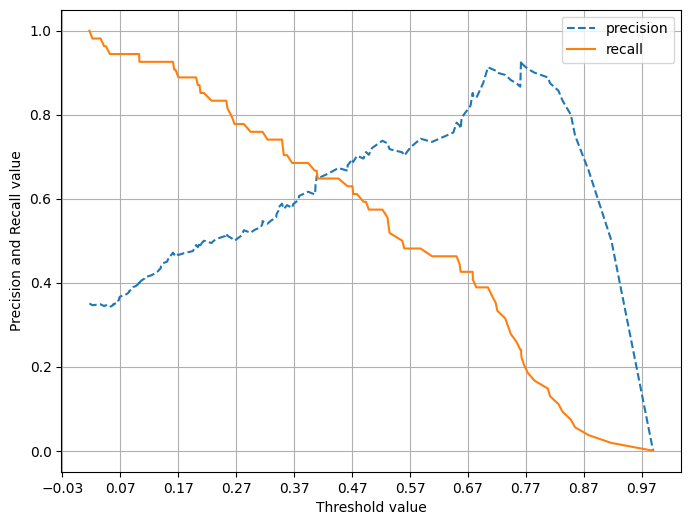

In [79]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [80]:
# 피처 값 분포도 살펴보기
dd.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

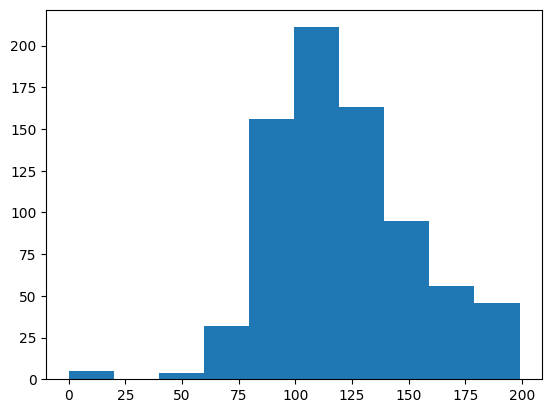

In [82]:
plt.hist(dd['Glucose'], bins=10)
# 0값이 일정 수준 존재함

In [83]:
# 0값 검사할 피처 명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = dd['Glucose'].count()

for feature in zero_features:
    zero_count = dd[dd[feature] == 0][feature].count()
    print('{0} 0 건수는 {1} , 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5 , 퍼센트는 0.65%
BloodPressure 0 건수는 35 , 퍼센트는 4.56%
SkinThickness 0 건수는 227 , 퍼센트는 29.56%
Insulin 0 건수는 374 , 퍼센트는 48.70%
BMI 0 건수는 11 , 퍼센트는 1.43%


In [84]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균값으로 대체
mean_zero_features = dd[zero_features].mean()
dd[zero_features] = dd[zero_features].replace(0, mean_zero_features)

In [85]:
X = dd.iloc[:, :-1]
y = dd.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

#로지스틱회귀로학습, 예측및평가수행.
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
정확도:0.7987, 정밀도:0.7674, 재현율:0.6111, F1:0.680412, AUC:0.8433
